Given the root of a binary search tree and the lowest and highest boundaries as low and high, trim the tree so that all its elements lies in [low, high]. Trimming the tree should not change the relative structure of the elements that will remain in the tree (i.e., any node's descendant should remain a descendant). It can be proven that there is a unique answer.

Return the root of the trimmed binary search tree. Note that the root may change depending on the given bounds.

Example 1:

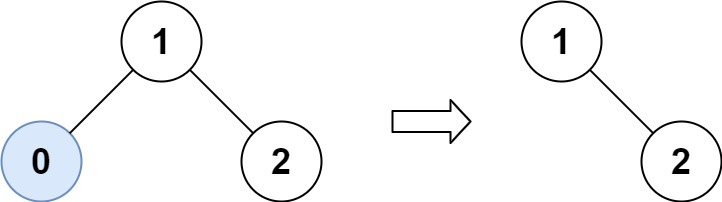

Input: root = [1,0,2], low = 1, high = 2
Output: [1,null,2]

Example 2:

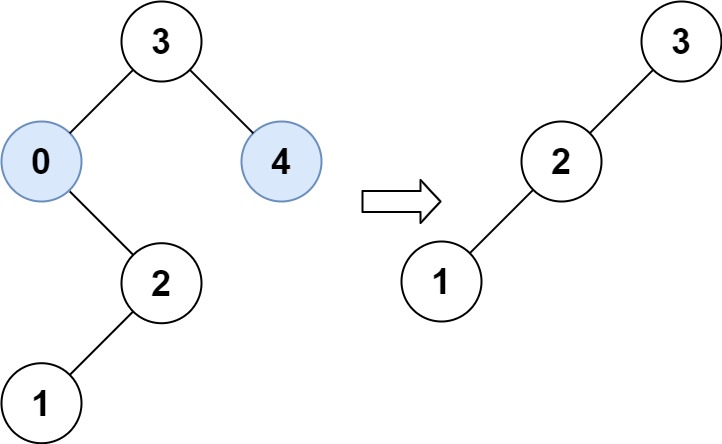

Input: root = [3,0,4,null,2,null,null,1], low = 1, high = 3
Output: [3,2,null,1]

Constraints:

    The number of nodes in the tree in the range [1, 104].
    0 <= Node.val <= 104
    The value of each node in the tree is unique.
    root is guaranteed to be a valid binary search tree.
    0 <= low <= high <= 104



In [17]:
from typing import Optional

# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


class Solution:
    def trimBST(self, root: Optional[TreeNode], low: int, high: int) -> Optional[TreeNode]:
        if not root:
            return None
        while root and (root.val > high or root.val < low):
            if root.val > high:
                root = root.left
            elif root.val < low:
                root = root.right
        
        def trim_children(node):
            if not node:
                return
            while node.left and node.left.val < low:
                node.left = node.left.right
            while node.right and node.right.val > high:
                node.right = node.right.left
            
            trim_children(node.left)
            trim_children(node.right)
        
        trim_children(root)
        return root

In [20]:
s = Solution()
s.trimBST(TreeNode(1, TreeNode(0), TreeNode(2)), 1,  2)

In [21]:
s.trimBST(TreeNode(3, TreeNode(0, None, TreeNode(2, TreeNode(1))), TreeNode(4)), 1,  2)

In [22]:
s.trimBST(TreeNode(1, None, TreeNode(2)), 2,  4)